# <center>Machine Learning Project</center>

** **
## <center>*01 - Exploratory Data Analysis & Preprocessing*</center>

** **

The members of the `team` are:
- Ana Farinha - 20211514
- Francisco Capontes - 20211692
- Maria Cruz - 20230760
- Sofia Gomes - 20240848
- Tahiya Laboni - 20240943


## <span style="color:salmon"> Description of the project  </span> 

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, volunteer firefighters, volunteer ambulance workers, and volunteer civil defence workers’ benefits. As the regulating authority, the WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury. Since 2000, the WCB has assembled and reviewed more than 5 million claims.

However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received.

## <span style="color:salmon"> Table of Contents </span>

<a class="anchor" id="top"></a>

1. [Importing Libraries & Data](#1-importing-libraries--data) <br><br>

2. [Exploratory Data Analysis](#2-exploratory-data-analysis) <br>  
   2.1 [Initial Exploration](#21-initial-exploration) <br>  
   2.2 [Duplicates](#22-duplicates) <br>  
   2.3 [Missing Values](#23-missing-values) <br>  
   2.4 [Target Distribution](#24-target-distribution) <br>  
   2.5 [Numerical Variables](#25-numerical-variables) <br>  
   2.6 [Categorical Variables](#26-categorical-variables) <br>  
   2.7 [Date Variables](#27-date-variables) <br><br>  

3. [Clean and Pre-processing](#3-clean-and-pre-processing) <br>  
   3.1 [Data Types](#31-data-types) <br>  
   3.2 [Incoherencies](#32-incoherencies) <br>  
   3.3 [Handling Missing Values](#33-handling-missing-values) <br>  
   3.4 [Removing Outliers](#34-removing-outliers) <br><br>  

4. [Feature Engineering](#4-feature-engineering) <br>  
   4.1 [Creating New Features](#41-creating-new-features) <br>  
   4.2 [Transforming Existing Features](#42-transforming-existing-features) <br><br>  

5. [Other Visualizations](#5-other-visualizations) <br><br>  

6. [Variable Encoding](#6-variable-encoding) <br><br>

7. [Scaling](#7-scaling) <br><br>

8. [Feature Selection](#8-feature-selection) <br><br>  

9. [Export Dataset](#9-export-dataset) <br>


#### <span style="color:yellow"> Put the hyperlinks in Table of Contents working</span> 

## <span style="color:salmon"> 1. Import Libraries & Data  </span> 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Missing Values
import missingno as msno

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Encoding libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from utils import *

In [2]:
train_df = pd.read_csv('./project_data/train_data.csv')
train_df

/var/folders/9b/jd3m9d1938sb3269cy5k5rzh0000gn/T/ipykernel_74403/1279091846.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./project_data/train_data.csv')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <span style="color:salmon"> 2. Exploratory Data Analysis  </span> 

#### <span style="color:salmon"> 2.1 Initial Exploration </span> 

In order to better understand the dataset we can use some functions, like the following:

1. See the first ten lines 

In [3]:
train_df.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
6,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaN,LM INSURANCE CORP,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
7,2019-12-30,33.0,N,2020-01-01,N,0.00,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0
8,2019-12-23,55.0,N,2020-01-01,N,0.00,1964.0,2020-01-01,NaN,"ROCHESTER, UNIVERSITY OF",...,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0
9,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,NaN,LM INSURANCE CORP,...,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0


2. Get information about the data types in each column, non-null values and memory usage

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

3. Get the shape of the dataset

In [5]:
train_df.shape

(593471, 33)

#### <span style="color:salmon"> 2.2 Duplicates </span> 

This section is divided into two main parts: checking for duplicated `Claim Indentifier` and searching for duplicated rows.

1.  Check for duplicated IDs

This dataset contains a variable called `Claim Identifier` which should be unique to each injuty claim / row. 

In [6]:
# Search for duplicated 'Claim Identifier'
train_df['Claim Identifier'].duplicated().sum()

1

Above, it can be verified the existence of two rows with the same `Claim Identifier`. To better understand why that happened, it can be seen below the rows with the same IDs.

In [7]:
# Check for duplicated values in 'Claim Identifier'
duplicated_claims = train_df['Claim Identifier'].duplicated(keep=False)

train_df[duplicated_claims]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The rows are almost empty so we decided to drop these two. Afterwards, the possibility of existing similar almost empty rows will be explored.

In [8]:
train_df.drop_duplicates(subset='Claim Identifier', keep=False, inplace=True)

After dropping the repeated `Claim Identifier`, the variable was set as the index.

In [9]:
train_df = train_df.set_index('Claim Identifier')

2. Search for duplicated rows

In [10]:
print(f'There are {train_df.duplicated().sum()} duplicated rows, which represent {(train_df.duplicated().sum()/len(train_df) * 100):.1f}% of the dataset')

There are 18348 duplicated rows, which represent 3.1% of the dataset


Before deciding what to do with these duplicated rows, lets explore them a bit.

In [11]:
train_df[train_df.duplicated(keep=False)].describe()

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
mean,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
std,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
min,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
25%,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
50%,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
75%,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
max,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


Above are the descriptive statistics of the duplicated rows.  
We can see that the columns have missing values. Because they do not add information, we decided to remove them.

In [12]:
train_df = train_df.drop_duplicates(keep=False)

#### <span style="color:salmon"> 2.3 Missing Values </span> 

After removing the duplicated values full of missing values, we decided to see the remaining na per column.

In [13]:
# Display the percentage of missing values per column

missing_values = train_df.isnull().sum() / len(train_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

OIICS Nature of Injury Description    100.000000
IME-4 Count                            76.864556
First Hearing Date                     73.730018
C-3 Date                               67.380632
Birth Year                              5.065642
Average Weekly Wage                     4.991255
Zip Code                                4.988816
WCIO Part Of Body Description           2.975485
WCIO Part Of Body Code                  2.975485
WCIO Nature of Injury Description       2.727238
WCIO Nature of Injury Code              2.727238
WCIO Cause of Injury Code               2.724276
WCIO Cause of Injury Description        2.724276
C-2 Date                                2.536131
Industry Code Description               1.734422
Industry Code                           1.734422
Accident Date                           0.642308
dtype: float64

Columns like `OIICS Nature of Injury Description`, `IME-4 Count`, and `First Hearing Date` have over 60% missing, with some 100% missing. These may need to be removed or further investigated. Columns such as `Birth Year`, `Average Weekly Wage`, and `Zip Code` have around 5% missing and can likely be imputed. Columns like `Accident Date` and `Industry Code` have minimal missing data (below 1%) and can be imputed or removed with minimal impact.

Actions include removing columns with 100% missing data, imputing or removing columns with 60%-70% missing values, imputing columns with 2%-5% missing data, and reviewing columns with <1% missing for possible imputation or removal.


After seeing the columns with more missing values, let's check the rows.

In [14]:
# Calculate the percentage of missing values per row
missing_percentage_per_row = (train_df.isnull().sum(axis=1) / train_df.shape[1]) * 100

missing_percentage_per_row.sort_values(ascending=False)


Claim Identifier
5756485    46.875
5866417    46.875
5737465    46.875
5491781    46.875
5939237    46.875
            ...  
6164515     3.125
5394022     3.125
5393820     3.125
5393996     3.125
5394433     3.125
Length: 574024, dtype: float64

The dataset shows a wide range of missing values per row. Some rows, identified by `Claim Identifier`, have a significantly high percentage of missing values, with several rows showing 44.12% missing data. On the other hand, a few rows exhibit much lower missing percentages, as low as 2.94%. 

This indicates that a large proportion of the data for certain rows is missing, while others have relatively fewer missing values. Rows with more than 40% missing data may require special handling, such as imputation or removal, depending on the context and importance of the data.

**Heatmap of Missing Values**

The heatmap shows correlations between missing values in different columns, revealing if missingness in one column is associated with missingness in another.

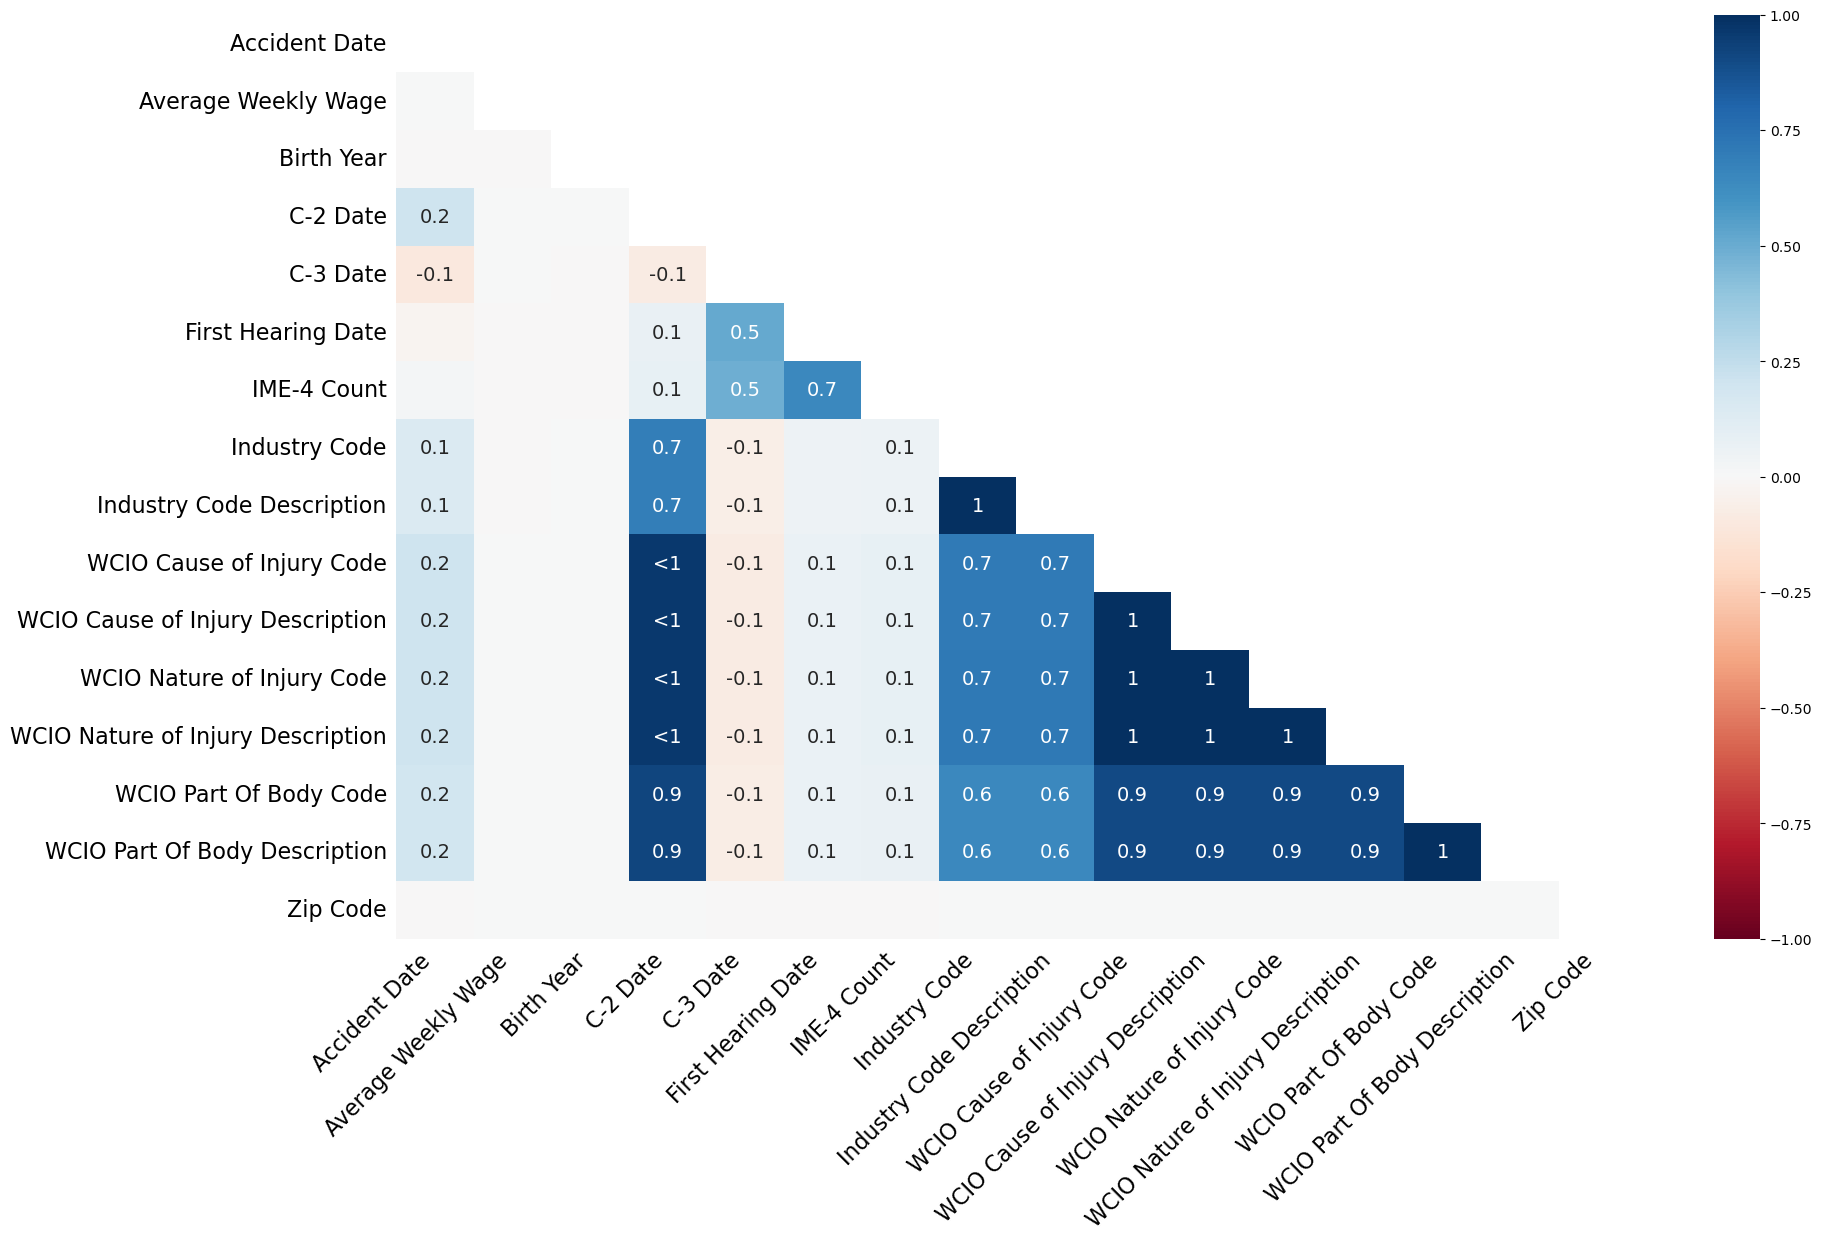

In [15]:
msno.heatmap(train_df)
plt.show()

Conclusions about this heatmap:
* A high correlation 0.9, suggesting that when one is missing, the other often is too, like in WCIO
* A correlation 0.5 to 0.7 imply a weaker but still noteworthy relationship, like in WCIO and Industry code
* A correlation close to zero or negative imply little to no relationship, suggesting that missingness in one column does not predict missingness in the other, like in Accident date, average weekly wage and others

**Dendogram of Missing Values**

The dendrogram groups columns with similar patterns of missing values. It’s useful for identifying clusters of columns that have related missing data patterns, which might be caused by specific conditions or categories.

<Figure size 1200x600 with 0 Axes>

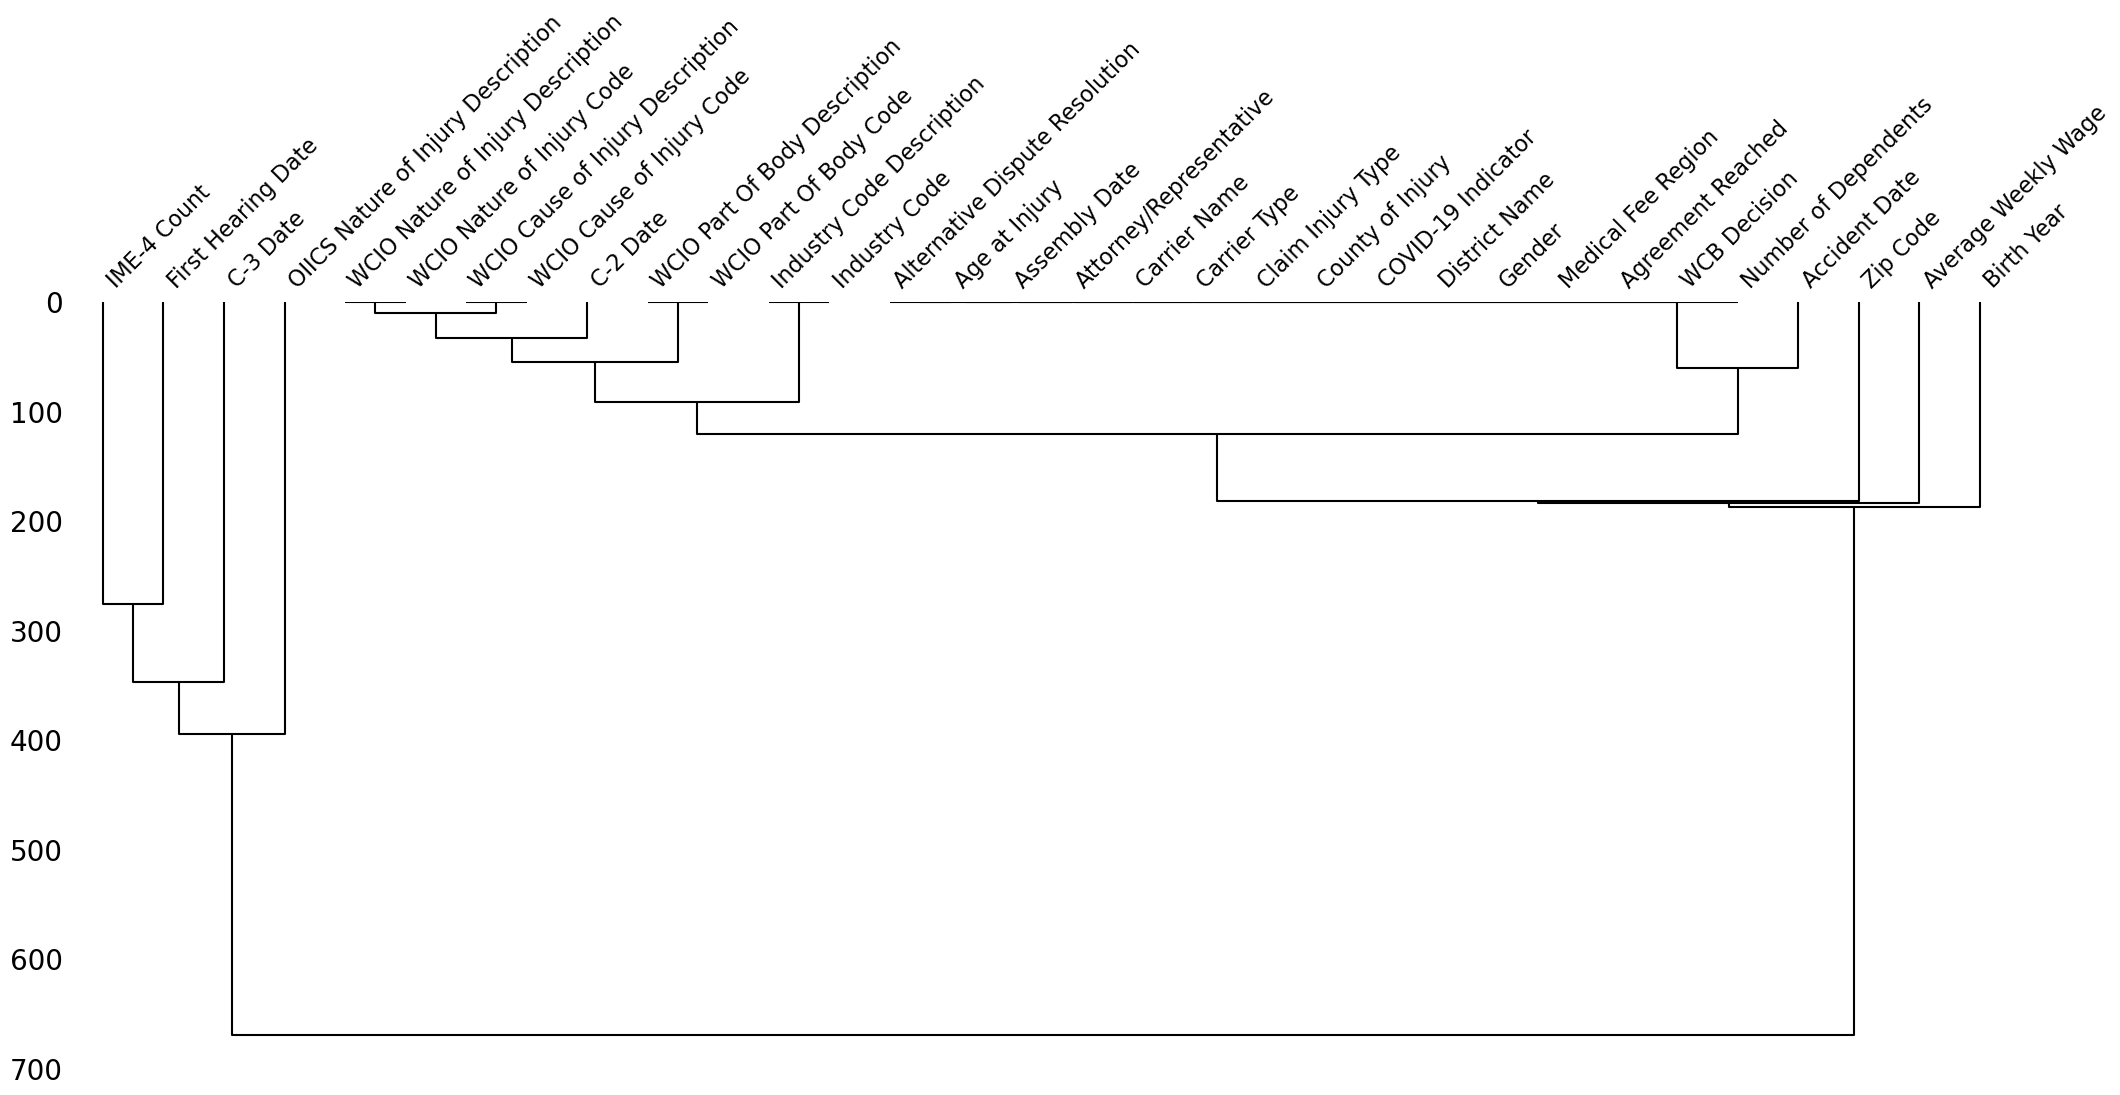

In [16]:
plt.figure(figsize=(12, 6))
msno.dendrogram(train_df)
plt.show()

Conclusions about dendrogram:
* We can divide this in two parts:
    1. IME-4 count, first hearing date, C-3 Date
    2. remaining columns

#### <span style="color:salmon"> 2.4 Target Distribution </span> 

To get to know our data, we started by exploring the target variable `Claim Injury Type`. To do so, we created a freaquency bar chart.

<AxesSubplot:title={'center':'Frequency of Claim Injury Type'}, xlabel='Claim Injury Type', ylabel='count'>

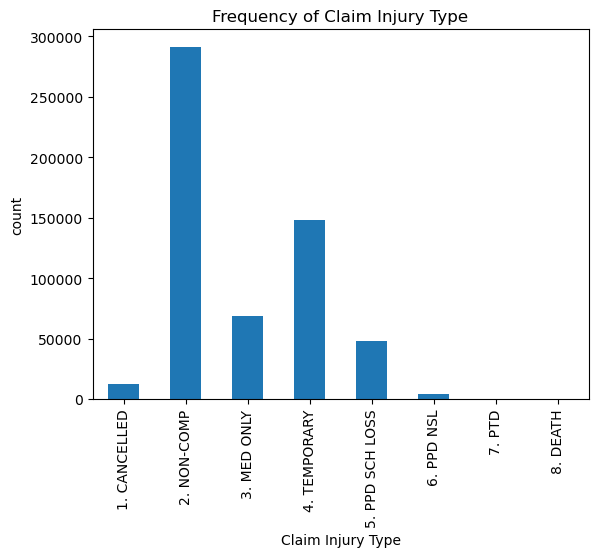

In [17]:
# Using value_counts to get counts per state and plotting
train_df['Claim Injury Type'].value_counts().sort_index().plot(kind='bar', xlabel='Claim Injury Type', ylabel='count', title='Frequency of Claim Injury Type')

Conclusions about the frequency of Claim Injury type:
* There is a large discrepancy between the values
* The most frequent is NON-COMP
* The one with the lowest frequency is PTD and DEATH

#### <span style="color:salmon"> 2.5 Numerical Variables </span> 

Numerical variables represent measurable quantities and can be analyzed mathematically. <br>  
The numerical variables that exist in this dataset are:

In [18]:
numerical_features = [
    'Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents'
]

In [19]:
numerical_df = train_df[numerical_features]
numerical_df

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents
Claim Identifier,,,,,
5393875,31.0,0.00,1988.0,NaN,1.0
5393091,46.0,1745.93,1973.0,4.0,4.0
5393889,40.0,1434.80,1979.0,NaN,6.0
5393887,61.0,NaN,1958.0,NaN,1.0
5393863,67.0,0.00,1952.0,NaN,5.0
...,...,...,...,...,...
6165265,35.0,0.00,1987.0,NaN,4.0
6165285,33.0,0.00,1989.0,NaN,6.0
6165506,61.0,991.08,1961.0,1.0,3.0


Show some statistics about the numerical_df:

In [20]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574024.0,42.114417,14.256240,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545373.0,491.090122,6092.929220,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544946.0,1886.767305,414.645155,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Number of Dependents,574024.0,3.006569,2.000797,0.0,1.0,3.0,5.0,6.0



- **Age at Injury**: 
    - Mean age is 42.11 years with a standard deviation of 14.26
    - The ages range from 0 to 117 years, with the 25th percentile at 31, the median at 42, and the 75th percentile at 54
    - 75% of the people has 54 age at injury
- **Average Weekly Wage**: 
    - Mean weekly wage is 491.09 with a very high standard deviation of 6092.92
    - The wages range from 0 to a maximum of 2,828,079
    - 75% have an average weekly wage of 841
- **Birth Year**: 
    - The mean birth year is around 1886.77 with a standard deviation of 414.64
    - The birth years range from 0 to 2018
- **IME-4 Count**: 
    - Mean count is 3.21 with a standard deviation of 2.83
- **Number of Dependents**: 
    - Mean is 3 and the standard deviation is 2
    - The range of number of dependencies is 0 to 6



For a better understanding of the numerical_features, we did some plots:

In [ ]:
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 5*len(numerical_features)))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
    
for idx, feature in enumerate(numerical_features):
    # Histogram with KDE
    sns.histplot(data=numerical_df, x=feature, kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribution of {feature}')
    axes[idx, 0].set_xlabel(feature)
        
    # Box plot
    sns.boxplot(data=numerical_df, y=feature, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Box Plot of {feature}')
    
plt.tight_layout()
plt.show()

In [ ]:
# Specify the feature you want to analyze
feature = "Average Weekly Wage"

# Set up a 1x2 subplot for the histogram and box plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(f'Distribution Analysis of {feature}', fontsize=16, y=1.02)

# Histogram with KDE
sns.histplot(data=numerical_df, x=feature, kde=False, ax=axes[0])
axes[0].set_title(f'Distribution of {feature}')
axes[0].set_xlabel(feature)

# Set x-axis limits to accommodate larger values
axes[0].set_xlim(0, 1500)  # Adjust the upper limit as needed

# Box plot
sns.boxplot(data=numerical_df, y=feature, ax=axes[1])
axes[1].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

- **Age at Injury**: 
    - The distribution of ages at injury is unimodal, with peaks around 30 and 60 years old.
    - Most injuries occur between 20 and 60 years of age.
    - There are outliers in the data, including some extremely high values that may be inaccurate.
- **Average Weekly Wage**: 
    - A significant portion of the data has an average weekly wage of 0.0, indicating potential missing or incorrect data.
- **Birth Year**: 
    - The data contains an invalid birth year of 0.
- **IME-4 Count**: 
    - A majority of the IME-4 Count values are missing(NaN).
- **Number of Dependents**: 
    - The distribution of the number of dependents is relatively uniform, with values ranging from 0 to 6.
    - The majority of the values are between the 1 and 5 dependents



We then created correlation matrix of numerical features.

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

As we can see, we can not see any significant correlation with any of the numerical features. We concluded that actuay they have 0 correlation between them.

We will do some scatter plots for age-related and financial features to see if we can get any relationship

In [ ]:
# Setting up the figure
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Key Feature Relationships', fontsize=16, y=1.02)

# Age at Injury vs Average Weekly Wage
sns.scatterplot(data=numerical_df, 
                x='Age at Injury', 
                y='Average Weekly Wage',
                ax=axes[0, 0])
axes[0, 0].set_title('Age at Injury vs Average Weekly Wage')

# Age at Injury vs Number of Dependents
sns.scatterplot(data=numerical_df, 
                x='Age at Injury', 
                y='Number of Dependents',
                ax=axes[0, 1])
axes[0, 1].set_title('Age at Injury vs Number of Dependents')

# Birth Year vs Average Weekly Wage
sns.scatterplot(data=numerical_df, 
                x='Birth Year', 
                y='Average Weekly Wage',
                ax=axes[1, 0])
axes[1, 0].set_title('Birth Year vs Average Weekly Wage')

# Average Weekly Wage vs Number of Dependents
sns.scatterplot(data=numerical_df, 
                x='Average Weekly Wage', 
                y='Number of Dependents',
                ax=axes[1, 1])
axes[1, 1].set_title('Average Weekly Wage vs Number of Dependents')
    
plt.tight_layout()
plt.show()

We can't conclude much from combining feature<br>
    *The missing values produce much noise*

#### <span style="color:salmon"> 2.6 Categorical Variables </span> 

Categorical variables represent characteristics or qualities that group data into distinct categories or labels. <br>  
In this dataset, the categorical variables are:

In [ ]:
categorical_features = [
    'Alternative Dispute Resolution', 'Attorney/Representative',
    'Carrier Name',  'Carrier Type', 'County of Injury',
    'COVID-19 Indicator',  'District Name', 'Gender', 'Industry Code',
    'Industry Code Description',  'Medical Fee Region',  'WCIO Cause of Injury Code',
    'WCIO Cause of Injury Description',  'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',  'WCIO Part Of Body Code',
    'WCIO Part Of Body Description',  'Zip Code', 'Agreement Reached',
    'WCB Decision', 'Claim Injury Type'
]

In [ ]:
categorical_df = train_df[categorical_features]
categorical_df

Show some statistics about the categorical_df:

In [ ]:
categorical_df.describe().T

To facilitate the exploration of the categorical data, the second step taken was to see the unique values that each categorical variable has.

In [ ]:
# Check unique values of the categorical variables
for column in categorical_df.columns:
    print('=========================')
    print(categorical_df[column].value_counts())
    print(f'Missing values: {categorical_df[column].isna().sum()}')
    print('=========================')
    print()

*Conclusiona about Categorical variables*
- **Alternative Dispute Resolution**: 
    - Majority with 'N' (571,412)
    - Minor counts of 'Y' (2,609) and 'U' (5), indicating few unspecified cases
- **Carrier Name**: 
    - Diverse field with *STATE INSURANCE FUND* as the largest category
    - Total of 2,046 unique insurance providers
- **Claim Injury Type**: 
    - Target variable with 8 distinct categories
- **County of Injury**: 
    - 63 unique counties, with significant representation from *SUFFOLK* and *QUEENS*
- **Attorney/Representative**: 
    - Majority of claims without legal representation ('N': 392,291 vs 'Y': 181,735)
- **Gender**: 
    - Gender variable includes unknown values ('U' and 'X'), which will be replaced with 'Unknown'
- **Industry Code Description**: 
    - Significant representation in sectors like *Health Care* and *Public Administration*



In order to examine the distribution of categorical features, focusing on rare categories, unknown values, or high cardinality, we create some plots:

First, let's get information about the number of unique values in each feature.

This information is very useful because:

- It helps you understand the complexity of each feature

- It guides how you should visualize each feature
    Binary features might be best as pie charts
    Features with few categories work well as bar plots
    Features with many categories might need to be grouped or shown partially


- It helps identify potential data quality issues
    Too many unique values might indicate spelling errors or inconsistent data entry
    Too few unique values might indicate missing categories

In [ ]:
unique_counts = categorical_df.nunique().sort_values(ascending=True)
print("Number of unique values in each feature:")
print(unique_counts)

In [ ]:
# Separate features based on number of unique values
few_categories = [feat for feat in categorical_features if train_df[feat].nunique() <= 10]
many_categories = [feat for feat in categorical_features if train_df[feat].nunique() > 10]

In [ ]:
print("\nPlotting features with few categories")
if few_categories:
    plot_value_counts(train_df, few_categories)
    
print("\nPlotting features with many categories (top 10 values shown)")
if many_categories:
    plot_value_counts(train_df, many_categories)

In [ ]:
# Run the visualization
plot_categorical_features(categorical_df, categorical_features)

*Number of cases in each county*

In [ ]:
plot_cases_by_county(train_df)

#### <span style="color:salmon"> 2.7 Date Variables </span> 

In [ ]:
date_features = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

In [ ]:
date_train_df = train_df[date_features]
date_train_df

## <span style="color:salmon"> 3. Clean and pre-processing  </span> 

The transformations applied in the training dataset must also be applied to the validation and test dataset. As such, at the start of this section we will import the test dataset and create the validation dataset when its necessary to avoid information leakage.

In [ ]:
test_df = pd.read_csv('./project_data/test_data.csv', index_col='Claim Identifier')
test_df

Before strating cleaning and preprocessing the dataframes, we decided to compare the two dataframes.

In [ ]:
# Get the columns that are in train_df but not in test_df
missing_columns_in_test = set(train_df.columns) - set(test_df.columns)

# Print the result
print("Columns in train_df but not in test_df:", missing_columns_in_test)


Above, we can see that `test_df` does not have three columns that are in`train_df`. One is the target and the other we are going to put on the side.

#### <span style="color:salmon"> 3.1 Data Types </span> 

To see the types of each columns of the dataset

In [ ]:
train_df.dtypes

In [ ]:
test_df.dtypes

Above, it can be seen that the dates are considered objects while they should be considered dates. Additionally, the variables hat are codes should be considered strings not floats.

*Change date columns data type:*

In [ ]:
# Select date columns
date_cols = train_df.columns[train_df.columns.str.contains('Date')]
# Transform into date using pandas
train_df[date_cols] = train_df[date_cols].apply(pd.to_datetime)
test_df[date_cols] = test_df[date_cols].apply(pd.to_datetime)

*Change code columns to strings:*

In [ ]:
# Select code columns
code_cols = train_df.columns[train_df.columns.str.contains('Code')]
# Transform code columns to float
train_df[code_cols] = train_df[code_cols].astype('str')
test_df[code_cols] = test_df[code_cols].astype('str')

Also, the data type of the column "Age at Injury" and "Birth Year" is float, and we have to change to int

In [ ]:
train_df['Birth Year'] = pd.to_numeric(train_df['Birth Year'], errors='coerce').astype('Int64')
test_df['Birth Year'] = pd.to_numeric(test_df['Birth Year'], errors='coerce').astype('Int64')

train_df['Age at Injury'] = pd.to_numeric(train_df['Age at Injury'], errors='coerce').astype('Int64')
test_df['Age at Injury'] = pd.to_numeric(test_df['Age at Injury'], errors='coerce').astype('Int64')

#### <span style="color:salmon">  3.2 Incoherencies </span> 

1. There is some "Birth date" equal to 0. This values should became NAN values.

In [ ]:
train_df['Birth Year'].value_counts().sort_index()

In [ ]:
train_df['Birth Year'] = train_df['Birth Year'].replace(0, np.nan)
test_df['Birth Year'] = test_df['Birth Year'].replace(0, np.nan)

2. The min Age at injury shoudn´t be equal to 0


In [ ]:
train_df['Age at Injury'] = train_df['Age at Injury'].replace(0, np.nan)
test_df['Age at Injury'] = test_df['Age at Injury'].replace(0, np.nan)

3. "Person Age" shoud be greather than "Age at injury"

In [ ]:
# Calculate the age at accident (from the birth year and accident date)
train_df['Calculated_Age_at_Accident'] = train_df['Accident Date'].dt.year - train_df['Birth Year']

In [ ]:
train_df[(train_df['Age at Injury'].notna()) & 
                 (train_df['Calculated_Age_at_Accident'].notna()) &
                 (train_df['Age at Injury'] != train_df['Calculated_Age_at_Accident']) &
                 (abs(train_df['Age at Injury'] - train_df['Calculated_Age_at_Accident']) > 1)]

In [ ]:
train_df = train_df.drop('Calculated_Age_at_Accident', axis=1)

4. Average Weekly Wage shouldn´t be eaqual to 0 in min

In [ ]:
train_df['Average Weekly Wage'] = train_df['Average Weekly Wage'].replace(0, np.nan)
test_df['Average Weekly Wage'] = test_df['Average Weekly Wage'].replace(0, np.nan)

5. Compare the variables Industry Code and Industry Code Description, but there there is no inconsistency

In [ ]:
train_df.groupby('Industry Code')['Industry Code Description'].nunique().eq(1)

#### <span style="color:salmon"> 3.3 Handling Missing Values </span>

Before starting, let's check the columns that can be dropped or inputed.

In [ ]:
# Display the percentage of missing values per column

missing_values = train_df.isnull().sum() / len(train_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

In [ ]:
# Display the percentage of missing values per column

missing_values = test_df.isnull().sum() / len(test_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

We decided to drop `OIICS Nature of Injury Description` because it only has missing values.

In [ ]:
train_df = train_df.drop('OIICS Nature of Injury Description', axis = 1)
test_df = test_df.drop('OIICS Nature of Injury Description', axis = 1)

*Input `Accident Date`*

The second variable that we decided to tackle is `Accident Date`. While exploring the dataset, we noticed that in some cases that date is the same as `Assembly Date`. As such, we decided to replace the missing values with the other date.

In [ ]:
train_df[train_df['Accident Date'] == train_df['Assembly Date']]

In [ ]:
# Filter the rows where 'Accident Date' is NaN, but 'Assembly Date' is not NaN
condition = train_df['Accident Date'].isna() & train_df['Assembly Date'].notna()

# Replace missing 'Accident Date' with 'Assembly Date' where the condition is true
train_df.loc[condition, 'Accident Date'] = train_df.loc[condition, 'Assembly Date']

In [ ]:
# Filter the rows where 'Accident Date' is NaN, but 'Assembly Date' is not NaN in the test dataset
condition = test_df['Accident Date'].isna() & test_df['Assembly Date'].notna()

# Replace missing 'Accident Date' with 'Assembly Date' where the condition is true in the test dataset
test_df.loc[condition, 'Accident Date'] = test_df.loc[condition, 'Assembly Date']


*Calculate `Age at Injury`*

Afte, we can easily input are related to age/birth year. By using the relationship between `Age at Injury`, `Accident Date` and `Birth Year`, we can easily calculate some missing values.

In [ ]:
# Filter the rows where 'Age at Injury' is NaN, but 'Birth Year' and 'Accident Date' are not NaN
condition = train_df['Age at Injury'].isna() & train_df['Birth Year'].notna() & train_df['Accident Date'].notna()

# Replace missing 'Age at Injury' with the difference between 'Accident Date' and 'Birth Year'
train_df.loc[condition, 'Age at Injury'] = train_df.loc[condition, 'Accident Date'].dt.year - train_df.loc[condition, 'Birth Year']


# Filter the rows where 'Age at Injury' is NaN, but 'Birth Year' and 'Accident Date' are not NaN in the test dataset
condition = test_df['Age at Injury'].isna() & test_df['Birth Year'].notna() & test_df['Accident Date'].notna()

# Replace missing 'Age at Injury' with the difference between 'Accident Date' and 'Birth Year' where the condition is true
test_df.loc[condition, 'Age at Injury'] = test_df.loc[condition, 'Accident Date'].dt.year - test_df.loc[condition, 'Birth Year']


*Calculate `Birth Year`*

In [ ]:
# Filter the rows where 'Birth Year' is NaN, but 'Age at Injury' and 'Accident Date' are not NaN
condition = train_df['Birth Year'].isna() & train_df['Age at Injury'].notna() & train_df['Accident Date'].notna()

# Replace missing 'Birth Year' with the difference between 'Accident Date' year and 'Age at Injury'
train_df.loc[condition, 'Birth Year'] = train_df.loc[condition, 'Accident Date'].dt.year - train_df.loc[condition, 'Age at Injury']


# Filter the rows where 'Birth Year' is NaN, but 'Age at Injury' and 'Accident Date' are not NaN in the test dataset
condition = test_df['Birth Year'].isna() & test_df['Age at Injury'].notna() & test_df['Accident Date'].notna()

# Replace missing 'Birth Year' with the difference between 'Accident Date' year and 'Age at Injury' where the condition is true
test_df.loc[condition, 'Birth Year'] = test_df.loc[condition, 'Accident Date'].dt.year - test_df.loc[condition, 'Age at Injury']


*Input `IME-4 Count`*

The next colum is `IME-4 Count` which also has a high number of missing values. In this case, we started to explore the values that the variable already had.

In [ ]:
train_df['IME-4 Count'].unique()

As this variables represents the number of IME-4 forms received per claim and its never 0, we reached the conclusion that the missing values mean that to IME4-forms was received for the claim. As such, we decided to replace the missing values with 0.

In [ ]:
train_df['IME-4 Count'] = train_df['IME-4 Count'].fillna(0)
test_df['IME-4 Count'] = test_df['IME-4 Count'].fillna(0)

*Some Conclusions*

As for the other columns like `WCIO Part Of Body Description`, `WCIO Nature of Injury Description` and `WCIO Cause of Injury Description`, they are only essential to interpret the codes in the other columns so we decided not to do anything.

To conclude this section, we decided to see how many missing values we still have.

In [ ]:
# Display the percentage of missing values per column

missing_values = train_df.isnull().sum() / len(train_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

In [ ]:
# Display the percentage of missing values per column

missing_values = test_df.isnull().sum() / len(test_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

The variables `Age at Injury`, `Birth Year` and `Average Weekly Wage` will be inputed using the median. However, due to the high amount of missing values in the last one, there is a high chance that it will not be used. As for the other two, only one will be inputed because the other can be calculated after having the other one.

In the variable `First Hearing Date`, a blank space means the the claim has not yet had a hearing held. Additionally, missing values in `C2-Date` and `C3-Date` mean that the event is yet to happen. To distinguish this NAs from true missing values, we decided to replace them with -1. THis will be done in the section of feature engineering.

**Splitting the Data**

In [ ]:
# Split train_df into training and validation sets
training_df, validation_df = train_test_split(train_df, test_size=0.2, random_state=42)

*Input `Age at Injury`*

In [ ]:
# Calculate median of 'Age at Injury' in training_df
age_at_injury_median = training_df['Age at Injury'].median()

# Fill missing values in 'Age at Injury' in training_df using .loc
training_df.loc[:, 'Age at Injury'] = training_df['Age at Injury'].fillna(age_at_injury_median)

# Apply the median imputation to validation_df and test_df using .loc
validation_df.loc[:, 'Age at Injury'] = validation_df['Age at Injury'].fillna(age_at_injury_median)
test_df.loc[:, 'Age at Injury'] = test_df['Age at Injury'].fillna(age_at_injury_median)


*Input `Birth Year`*

In [ ]:
# Filter the rows where 'Birth Year' is NaN, but 'Age at Injury' and 'Accident Date' are not NaN
condition = training_df['Birth Year'].isna() & training_df['Age at Injury'].notna() & training_df['Accident Date'].notna()
# Replace missing 'Birth Year' with the difference between 'Accident Date' year and 'Age at Injury'
training_df.loc[condition, 'Birth Year'] = training_df.loc[condition, 'Accident Date'].dt.year - training_df.loc[condition, 'Age at Injury']


# Filter the rows where 'Birth Year' is NaN, but 'Age at Injury' and 'Accident Date' are not NaN
condition = validation_df['Birth Year'].isna() & validation_df['Age at Injury'].notna() & validation_df['Accident Date'].notna()
# Replace missing 'Birth Year' with the difference between 'Accident Date' year and 'Age at Injury'
validation_df.loc[condition, 'Birth Year'] = validation_df.loc[condition, 'Accident Date'].dt.year - validation_df.loc[condition, 'Age at Injury']


# Filter the rows where 'Birth Year' is NaN, but 'Age at Injury' and 'Accident Date' are not NaN in the test dataset
condition = test_df['Birth Year'].isna() & test_df['Age at Injury'].notna() & test_df['Accident Date'].notna()
# Replace missing 'Birth Year' with the difference between 'Accident Date' year and 'Age at Injury' where the condition is true
test_df.loc[condition, 'Birth Year'] = test_df.loc[condition, 'Accident Date'].dt.year - test_df.loc[condition, 'Age at Injury']

*Input `Average Weekly Wage`*

In [ ]:
# Calculate median of 'Average Weekly Wage' in training_df
average_wage_median = training_df['Average Weekly Wage'].median()

# Fill missing values in 'Average Weekly Wage' in training_df using .loc
training_df.loc[:, 'Average Weekly Wage'] = training_df['Average Weekly Wage'].fillna(average_wage_median)

# Apply the median imputation to validation_df and test_df using .loc
validation_df.loc[:, 'Average Weekly Wage'] = validation_df['Average Weekly Wage'].fillna(average_wage_median)
test_df.loc[:, 'Average Weekly Wage'] = test_df['Average Weekly Wage'].fillna(average_wage_median)

*Final Conclusions*

Now, its time to verify that there are no more unexpected missing values. The features that are allowed to have NAs at this point are: `First Hearing Date`, `C-3 Date`, `WCIO Part Of Body Description`, `WCIO Nature of Injury Description `, `WCIO Cause of Injury Description` and `C-2 Date`.

In [ ]:
# Display the percentage of missing values per column

missing_values = training_df.isnull().sum() / len(training_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

In [ ]:
# Display the percentage of missing values per column

missing_values = validation_df.isnull().sum() / len(validation_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

In [ ]:
# Display the percentage of missing values per column

missing_values = test_df.isnull().sum() / len(test_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

#### <span style="color:salmon"> 3.4 Removing Outliers </span> 

In [ ]:
# Cap Age at Injury at 100 to handle potential outliers
#training_df['Age at Injury'] = np.where(training_df['Age at Injury'] > 100, 100, training_df['Age at Injury'])

We use the method Z-score to identify the outliers based on the number of standard deviations from the mean. The threshold that we use is 3. That means that any data point with a Z-score beyond this range is considered an outlier. 

In [ ]:
training_df = training_df[(np.abs(stats.zscore(training_df)) < 3).all(axis=1)]

## <span style="color:salmon"> 4. Feature Engineering </span> 

#### <span style="color:salmon"> 4.1 Creating New Features </span> 

*Date Features*

Dates can hold a lot of valuable information. We can extract components like year, month, and day of the week, which may capture seasonality or trends.<br><br>
For the date columns:<br>
__1. Year, Month, Day:__ These could provide insights on seasonality.<br>
__2. Day of Week:__ Useful for identifying patterns on specific days.<br>
__3. Time Differences:__ Calculating time spans between dates can be useful for tracking progress or delays in cases.

In [ ]:
# List of date columns to extract components from
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Loop through each date column and extract year, month, day, and day of the week
for col in date_columns:
    # Extract components from each date column, filling missing values with -1
    training_df[f'{col}_Year'] = training_df[col].dt.year.fillna(-1).astype(int)
    training_df[f'{col}_Month'] = training_df[col].dt.month.fillna(-1).astype(int)
    training_df[f'{col}_Day'] = training_df[col].dt.day.fillna(-1).astype(int)
    training_df[f'{col}_DayOfWeek'] = training_df[col].dt.dayofweek.fillna(-1).astype(int)

In [ ]:
# List of date columns to extract components from
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Loop through each date column and extract year, month, day, and day of the week
for col in date_columns:
    # Extract components from each date column, filling missing values with -1
    validation_df[f'{col}_Year'] = validation_df[col].dt.year.fillna(-1).astype(int)
    validation_df[f'{col}_Month'] = validation_df[col].dt.month.fillna(-1).astype(int)
    validation_df[f'{col}_Day'] = validation_df[col].dt.day.fillna(-1).astype(int)
    validation_df[f'{col}_DayOfWeek'] = validation_df[col].dt.dayofweek.fillna(-1).astype(int)

In [ ]:
# List of date columns to extract components from
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Loop through each date column and extract year, month, day, and day of the week
for col in date_columns:
    # Extract components from each date column in test_df, filling missing values with -1
    test_df[f'{col}_Year'] = test_df[col].dt.year.fillna(-1).astype(int)
    test_df[f'{col}_Month'] = test_df[col].dt.month.fillna(-1).astype(int)
    test_df[f'{col}_Day'] = test_df[col].dt.day.fillna(-1).astype(int)
    test_df[f'{col}_DayOfWeek'] = test_df[col].dt.dayofweek.fillna(-1).astype(int)

*Calculate Time Differences*

Create new columns to capture the elapsed time between key dates, which can help understand delays or the timeline of events.

In [ ]:
# Calculate the time difference between relevant dates
training_df['Days_to_First_Hearing'] = (training_df['First Hearing Date'] - training_df['Accident Date']).dt.days
training_df['Days_to_C2'] = (training_df['C-2 Date'] - training_df['Accident Date']).dt.days
training_df['Days_to_C3'] = (training_df['C-3 Date'] - training_df['Accident Date']).dt.days

Numerical features may benefit from transformations to reduce skewness or enhance interpretability.

*Age at Injury*

In [ ]:
training_df['Age at Injury'].describe()

__Binning:__ Group ages into categories like "young" or "senior" if such categories might capture different risk profiles.<br>

In [ ]:
age_bins = [0, 25, 40, 55, 70, 100]
age_labels = ['Young', 'Mid-Age', 'Experienced', 'Senior', 'Elderly']
training_df['Age_Group'] = pd.cut(training_df['Age at Injury'], bins=age_bins, labels=age_labels)
validation_df['Age_Group'] = pd.cut(validation_df['Age at Injury'], bins=age_bins, labels=age_labels)
test_df['Age_Group'] = pd.cut(test_df['Age at Injury'], bins=age_bins, labels=age_labels)


*Average Weekly Wage*

Relative Wage Compared to Median Wage:<br>
Calculate whether the injured worker’s wage is above or below the median wage for the dataset, it's potentially reflecting job type or socioeconomic factors.

In [ ]:
median_wage = training_df['Average Weekly Wage'].median()
training_df['Relative_Wage'] = np.where(training_df['Average Weekly Wage'] > median_wage, 'Above Median', 'Below Median')
validation_df['Relative_Wage'] = np.where(validation_df['Average Weekly Wage'] > median_wage, 'Above Median', 'Below Median')
test_df['Relative_Wage'] = np.where(test_df['Average Weekly Wage'] > median_wage, 'Above Median', 'Below Median')

*Seasonality of Accident Date*

In [ ]:
# Apply the function to the 'Accident Date' column
training_df['Accident_Season'] = training_df['Accident Date'].apply(get_season)
validation_df['Accident_Season'] = validation_df['Accident Date'].apply(get_season)
test_df['Accident_Season'] = test_df['Accident Date'].apply(get_season)


*Accident Timing Indicator (Weekend or Holiday)*

In [ ]:
# Flag public holidays
training_df = flag_public_holiday_accidents(training_df, 'Accident Date')
validation_df = flag_public_holiday_accidents(validation_df, 'Accident Date')
test_df = flag_public_holiday_accidents(test_df, 'Accident Date')

In [ ]:
# Flag weekends
training_df = flag_weekend_accidents(training_df, 'Accident Date')
validation_df = flag_weekend_accidents(validation_df, 'Accident Date')
test_df = flag_weekend_accidents(test_df, 'Accident Date')

#### <span style="color:salmon"> 4.2 Transforming Existing Features </span> 

*Modifying `Alternative Dispute Resolution`*

Before making any alterations, we decided to check the 5 cases with `U` in the variable `Alternative Disputer Resolution`.

In [ ]:
training_df[training_df['Alternative Dispute Resolution'] == 'U'].T

Above, we can see that we have no data about the injury claim itself, so we decided to drop these rows.

In [ ]:
# Drop rows where 'Alternative Dispute Resolution' is 'U'
training_df = training_df[training_df['Alternative Dispute Resolution'] != 'U']


In the validation and test datasets the same can not be done. As such, the value `U` was replaced by the mode.

In [ ]:
test_df[test_df['Alternative Dispute Resolution'].isna()]

In [ ]:
# Calculate the mode for 'Alternative Dispute Resolution' in training_df
mode_alt_dispute_resol = training_df['Alternative Dispute Resolution'].mode()[0]

# Replace 'U' with the mode in validation_df and test_df
validation_df.loc[validation_df['Alternative Dispute Resolution'] == 'U', 'Alternative Dispute Resolution'] = mode_alt_dispute_resol
test_df.loc[test_df['Alternative Dispute Resolution'] == 'U', 'Alternative Dispute Resolution'] = mode_alt_dispute_resol


*Modifying `Carrier Type`*

In the `Carrier Type` column, there are three values that are similar which represent different types of special funds. Only 9 special funds could be identified, leaving 1023 unkown. As such, we decided to join all of them in the unkown special funds.

In [ ]:
training_df['Carrier Type'] = training_df['Carrier Type'].replace({'5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5D. SPECIAL FUND - UNKNOWN'})
training_df['Carrier Type'] = training_df['Carrier Type'].replace({'5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5D. SPECIAL FUND - UNKNOWN'})

validation_df['Carrier Type'] = validation_df['Carrier Type'].replace({'5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5D. SPECIAL FUND - UNKNOWN'})
validation_df['Carrier Type'] = validation_df['Carrier Type'].replace({'5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5D. SPECIAL FUND - UNKNOWN'})

test_df['Carrier Type'] = test_df['Carrier Type'].replace({'5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5D. SPECIAL FUND - UNKNOWN'})
test_df['Carrier Type'] = test_df['Carrier Type'].replace({'5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5D. SPECIAL FUND - UNKNOWN'})

*Modifying `Gender`*

In the `Gender` column, we replaced the values `U` and `X` with `Unknown`. The value `U` typically indicates "unknown" or unspecified gender, while `X` may signify a non-binary identity. By combining these two values into `Unknown`, we simplify the data, making it easier to analyze and interpret.

In [ ]:
# Replace 'U' with 'Unknown'
training_df['Gender'] = training_df['Gender'].replace({'U': 'Unknown'})
# Replace 'X' with 'Unknown'
training_df['Gender'] = training_df['Gender'].replace({'X': 'Unknown'})

# Replace 'U' with 'Unknown'
validation_df['Gender'] = validation_df['Gender'].replace({'U': 'Unknown'})
# Replace 'X' with 'Unknown'
validation_df['Gender'] = validation_df['Gender'].replace({'X': 'Unknown'})

# Replace 'U' with 'Unknown'
test_df['Gender'] = test_df['Gender'].replace({'U': 'Unknown'})
# Replace 'X' with 'Unknown'
test_df['Gender'] = test_df['Gender'].replace({'X': 'Unknown'})

## <span style="color:salmon"> 5. Other Visualizations </span> 

### <span style="color:yellow"> Add visualizations with cleaned data </span> 

In this next section, we are going to verify how our changes afted the data starting by the numerical variables. We started by creating a correlation matrix.

In [ ]:
correlation_matrix = training_df[training_df[numerical_df.columns].columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidth=.5, cmap="crest")
plt.show()

##### <span style="color:yellow"> VER OS VALORES </span> 

In [ ]:
selected_categorical_features = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
                     'District Name', 'Gender', 'Medical Fee Region', 'Industry Code Description', 'Agreement Reached', 'Claim Injury Type']

for feature in selected_categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=training_df[feature], order=training_df[feature].value_counts().index)  # x instead of y
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for readability
    plt.show()

## <span style="color:salmon"> 6. Variable Encoding </span> 

To use the categorical variables, it is necessary to encode them as most models do not accept non-numerical values.

*Alternative Dispute Resolution*

In [ ]:
# Initialize the encoder
enc_adr = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform on the training data
training_df['Alternative Dispute Resolution'] = enc_adr.fit_transform(training_df[['Alternative Dispute Resolution']]).astype(int)

# Transform the validation data using the same encoder
validation_df['Alternative Dispute Resolution'] = enc_adr.transform(validation_df[['Alternative Dispute Resolution']]).astype(int)

# Transform the test data using the same encoder
test_df['Alternative Dispute Resolution'] = enc_adr.transform(test_df[['Alternative Dispute Resolution']]).astype(int)


*Alternative Dispute Resolution*

In [ ]:
# Initialize the encoder
enc_ar = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform on the training data
training_df['Attorney/Representative'] = enc_ar.fit_transform(training_df[['Attorney/Representative']]).astype(int)

# Transform the validation and test data using the same encoder
validation_df['Attorney/Representative'] = enc_ar.transform(validation_df[['Attorney/Representative']]).astype(int)
test_df['Attorney/Representative'] = enc_ar.transform(test_df[['Attorney/Representative']]).astype(int)


*Carrier Type*

In [ ]:
# Define the custom order of categories for 'Carrier Type'
categories = [['UNKNOWN'] + sorted([cat for cat in training_df['Carrier Type'].unique() if cat != 'UNKNOWN'])]

# Initialize the OrdinalEncoder with the predefined categories
enc_ct = OrdinalEncoder(categories=categories)

# Apply the encoder to 'Carrier Type' in the training set
training_df['Carrier Type'] = enc_ct.fit_transform(training_df[['Carrier Type']]).astype(int)

# Apply the same encoding to the 'Carrier Type' column in validation_df and test_df
validation_df['Carrier Type'] = enc_ct.transform(validation_df[['Carrier Type']]).astype(int)
test_df['Carrier Type'] = enc_ct.transform(test_df[['Carrier Type']]).astype(int)

*County of Injury*

In [ ]:
find_duplicate_frequencies_and_map(training_df, 'County of Injury' , validation_df, test_df)

*COVID-19 Indicator*

In [ ]:
# Initialize OneHotEncoder and fit it to the training data
enc_covid = OneHotEncoder(sparse_output=False, drop='first')
training_df['COVID-19 Indicator'] = enc_covid.fit_transform(training_df[['COVID-19 Indicator']]).astype(int)

# Transform the validation and test data using the same encoder
validation_df['COVID-19 Indicator'] = enc_covid.transform(validation_df[['COVID-19 Indicator']]).astype(int)
test_df['COVID-19 Indicator'] = enc_covid.transform(test_df[['COVID-19 Indicator']]).astype(int)

*District Name*

In [ ]:
find_duplicate_frequencies_and_map(training_df, 'District Name', validation_df, test_df)

*Gender*

In [ ]:
# Perform one-hot encoding on 'Gender' in the training set
enc_gender = OneHotEncoder(sparse_output=False, drop=None)
encoded_gender = enc_gender.fit_transform(training_df[['Gender']])

# Convert the encoded array to a DataFrame
encoded_gender_train_df = pd.DataFrame(encoded_gender, columns=enc_gender.get_feature_names_out(['Gender']), index=training_df.index)

# Concatenate the one-hot encoded gender columns to the original DataFrame
training_df = pd.concat([training_df, encoded_gender_train_df], axis=1)

# Drop 'Gender_Unknown' column as it is the baseline column (if drop='first' was used, it would be dropped automatically)
training_df = training_df.drop('Gender_Unknown', axis=1)

# Transform the validation and test data using the already fitted encoder
encoded_gender_val = enc_gender.transform(validation_df[['Gender']])
encoded_gender_val_df = pd.DataFrame(encoded_gender_val, columns=enc_gender.get_feature_names_out(['Gender']), index=validation_df.index)
validation_df = pd.concat([validation_df, encoded_gender_val_df], axis=1)

encoded_gender_test = enc_gender.transform(test_df[['Gender']])
encoded_gender_test_df = pd.DataFrame(encoded_gender_test, columns=enc_gender.get_feature_names_out(['Gender']), index=test_df.index)
test_df = pd.concat([test_df, encoded_gender_test_df], axis=1)

# Drop 'Gender_Unknown' column in validation and test set, if necessary
validation_df = validation_df.drop('Gender_Unknown', axis=1)
test_df = test_df.drop('Gender_Unknown', axis=1)

*Industry Code*

In [ ]:
find_duplicate_frequencies_and_map(training_df, 'Industry Code', validation_df, test_df)

*Medical Fee Region*

In [ ]:
# Perform One-Hot Encoding for 'Medical Fee Region' in train_df
enc_med_fee_reg = OneHotEncoder(sparse_output=False, drop=None)

# Perform one-hot encoding and return as a dense array (not sparse)
encoded_med_fee_reg = enc_med_fee_reg.fit_transform(train_df[['Medical Fee Region']])

# Convert the array back to a DataFrame with aligned index
encoded_med_fee_reg_train_df = pd.DataFrame(encoded_med_fee_reg, columns=enc_med_fee_reg.get_feature_names_out(['Medical Fee Region']), index=train_df.index)

# Concatenate the one-hot encoded columns to the original training DataFrame
train_df = pd.concat([train_df, encoded_med_fee_reg_train_df], axis=1)

# Drop the 'Medical Fee Region_UK' column
train_df = train_df.drop('Medical Fee Region_UK', axis=1)


# Apply the same one-hot encoding to validation_df and test_df using the fitted encoder
encoded_med_fee_reg_val = enc_med_fee_reg.transform(validation_df[['Medical Fee Region']])
encoded_med_fee_reg_test = enc_med_fee_reg.transform(test_df[['Medical Fee Region']])

# Convert the encoded arrays to DataFrames
encoded_med_fee_reg_val_df = pd.DataFrame(encoded_med_fee_reg_val, columns=enc_med_fee_reg.get_feature_names_out(['Medical Fee Region']), index=validation_df.index)
encoded_med_fee_reg_test_df = pd.DataFrame(encoded_med_fee_reg_test, columns=enc_med_fee_reg.get_feature_names_out(['Medical Fee Region']), index=test_df.index)

# Concatenate the encoded columns to validation_df and test_df
validation_df = pd.concat([validation_df, encoded_med_fee_reg_val_df], axis=1)
test_df = pd.concat([test_df, encoded_med_fee_reg_test_df], axis=1)

# Drop the 'Medical Fee Region_UK' column
validation_df = validation_df.drop('Medical Fee Region_UK', axis=1)
test_df = test_df.drop('Medical Fee Region_UK', axis=1)

*WCIO Cause of Injury Code*

In [ ]:
find_duplicate_frequencies_and_map(training_df, 'WCIO Cause of Injury Code', validation_df, test_df)

*WCIO Nature of Injury Code*

In [ ]:
find_duplicate_frequencies_and_map(training_df, 'WCIO Nature of Injury Code')

#### <span style="color:yellow"> Not encoded above</span> 

*WCIO Part of Body Code*

In [ ]:
find_duplicate_frequencies_and_map(training_df, 'WCIO Part Of Body Code', validation_df, test_df)

*Zip Code*

In [ ]:
find_duplicate_frequencies_and_map(training_df, 'Zip Code')

#### <span style="color:yellow"> Not encoded above</span> 

*Claim Injury Type* - Target

In [ ]:
# Create a sorted list of unique categories in the 'Claim Injury Type' column of training_df
categories = sorted(cat for cat in training_df['Claim Injury Type'].unique())

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the training data
label_encoder.fit(categories)

# Encode the 'Claim Injury Type' column in training_df
training_df['Claim Injury Type Encoded'] = label_encoder.transform(training_df['Claim Injury Type'])

# Encode the 'Claim Injury Type' in validation_df using the same encoder
validation_df['Claim Injury Type Encoded'] = label_encoder.transform(validation_df['Claim Injury Type'])
# As it is the target, it is not applied to the test_df because it does not exist


## <span style="color:salmon"> 7. Scaling </span> 

#### <span style="color:yellow"> Select the necessary variables</span> 

In [ ]:
# Define your list of selected features
selected_features = ['Age at Injury', 'Average Weekly Wage', 'Accident Date_Year', 'Accident Date_Month']  

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training set with selected features
train_scaled = scaler.fit_transform(training_df[selected_features])

# Transform the validation set (using the same scaler)
validation_scaled = scaler.transform(validation_df[selected_features])

# Transform the test set (using the same scaler)
test_scaled = scaler.transform(test_df[selected_features])

# Convert back to DataFrame if needed, with original column names
train_scaled_df = pd.DataFrame(train_scaled, columns=selected_features)
validation_scaled_df = pd.DataFrame(validation_scaled, columns=selected_features)
test_scaled_df = pd.DataFrame(test_scaled, columns=selected_features)

## <span style="color:salmon"> 8. Feature Selection </span> 

#### <span style="color:yellow"> To do: traininng dataset only</span> 

#### <span style="color:salmon"> 8.1 Chi-Squared Test  </span> 

In [ ]:
for var in categorical_df.columns:
    TestIndependence(training_df[var],training_df['Claim Injury Type'], var)

## <span style="color:salmon"> 9. Export Dataset </span> 

### <span style="color:yellow"> Export clean dataset </span> 

#### <span style="color:yellow"> To do: Start running models in the other notebook</span> 